# Classification ML model

This 'project' is not any kind of investment advice or recommendation. 
Trading all assets is risky and please make every decision on your own. 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_pickle('EURUSD_2020-2023_15M.bz2')

In [32]:
# split into train and test data
train = df.iloc[:int(len(df)*0.8)]
test = df.iloc[int(len(df)*0.8):]

In [33]:
train['returns'] = np.log(train['close'] / train['close'].shift(1))

In [34]:
train.dropna(inplace=True)

In [35]:
train['direction'] = np.sign(train['returns'])

In [40]:
train.head()

,open,high,low,close,returns,direction,lag_1,lag_2,lag_3,lag_4,lag_5
time,,,,,,,,,,,
2020-01-02 01:30:00,1.12211,1.12217,1.12207,1.12208,-0.000027,-1.0,0.000089,0.000526,-0.000080,0.000062,0.000633
2020-01-02 01:45:00,1.12209,1.12209,1.12178,1.12189,-0.000169,-1.0,-0.000027,0.000089,0.000526,-0.000080,0.000062
2020-01-02 02:00:00,1.12189,1.12192,1.12162,1.12164,-0.000223,-1.0,-0.000169,-0.000027,0.000089,0.000526,-0.000080
2020-01-02 02:15:00,1.12163,1.12170,1.12157,1.12162,-0.000018,-1.0,-0.000223,-0.000169,-0.000027,0.000089,0.000526
2020-01-02 02:30:00,1.12164,1.12175,1.12158,1.12173,0.000098,1.0,-0.000018,-0.000223,-0.000169,-0.000027,0.000089


In [37]:
train['direction'].value_counts()

direction
 1.0    38547
-1.0    38254
 0.0     1171
Name: count, dtype: int64

In [38]:
lags = 5
cols = []  
for lag in range(1,lags+1):
    col = 'lag_{}'.format(lag)
    train[col] = train['returns'].shift(lag)
    cols.append(col)
train.dropna(inplace=True)

In [39]:
train.head()

,open,high,low,close,returns,direction,lag_1,lag_2,lag_3,lag_4,lag_5
time,,,,,,,,,,,
2020-01-02 01:30:00,1.12211,1.12217,1.12207,1.12208,-0.000027,-1.0,0.000089,0.000526,-0.000080,0.000062,0.000633
2020-01-02 01:45:00,1.12209,1.12209,1.12178,1.12189,-0.000169,-1.0,-0.000027,0.000089,0.000526,-0.000080,0.000062
2020-01-02 02:00:00,1.12189,1.12192,1.12162,1.12164,-0.000223,-1.0,-0.000169,-0.000027,0.000089,0.000526,-0.000080
2020-01-02 02:15:00,1.12163,1.12170,1.12157,1.12162,-0.000018,-1.0,-0.000223,-0.000169,-0.000027,0.000089,0.000526
2020-01-02 02:30:00,1.12164,1.12175,1.12158,1.12173,0.000098,1.0,-0.000018,-0.000223,-0.000169,-0.000027,0.000089


In [41]:
from sklearn.linear_model import LogisticRegression

In [47]:
lm = LogisticRegression(C = 1e6, max_iter = 100000, multi_class = "ovr")

lm.fit(train[cols], train['direction'])


LogisticRegression(C=1000000.0, max_iter=100000, multi_class='ovr')

In [48]:
train['prediction'] = lm.predict(train[cols])

In [49]:
train

,open,high,low,close,returns,direction,lag_1,lag_2,lag_3,lag_4,lag_5,prediction
time,,,,,,,,,,,,
2020-01-02 01:30:00,1.12211,1.12217,1.12207,1.12208,-0.000027,-1.0,0.000089,0.000526,-0.000080,0.000062,0.000633,-1.0
2020-01-02 01:45:00,1.12209,1.12209,1.12178,1.12189,-0.000169,-1.0,-0.000027,0.000089,0.000526,-0.000080,0.000062,-1.0
2020-01-02 02:00:00,1.12189,1.12192,1.12162,1.12164,-0.000223,-1.0,-0.000169,-0.000027,0.000089,0.000526,-0.000080,1.0
2020-01-02 02:15:00,1.12163,1.12170,1.12157,1.12162,-0.000018,-1.0,-0.000223,-0.000169,-0.000027,0.000089,0.000526,1.0
2020-01-02 02:30:00,1.12164,1.12175,1.12158,1.12173,0.000098,1.0,-0.000018,-0.000223,-0.000169,-0.000027,0.000089,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-16 12:45:00,1.07074,1.07129,1.07041,1.07063,-0.000093,-1.0,0.000009,0.000140,0.000476,0.000552,-0.000617,-1.0
2023-02-16 13:00:00,1.07063,1.07067,1.07010,1.07016,-0.000439,-1.0,-0.000093,0.000009,0.000140,0.000476,0.000552,-1.0
2023-02-16 13:15:00,1.07016,1.07020,1.06946,1.06946,-0.000654,-1.0,-0.000439,-0.000093,0.000009,0.000140,0.000476,1.0


In [50]:
train['prediction'].value_counts()

prediction
 1.0    43932
-1.0    34035
Name: count, dtype: int64

In [52]:
hits = np.sign(train['prediction'] * train['direction']).value_counts()
hits

 1.0    39904
-1.0    36892
 0.0     1171
Name: count, dtype: int64

In [54]:
hit_ratio = hits[1] / sum(hits) *100
hit_ratio

51.18062770146344

In [56]:
from sklearn.metrics import accuracy_score

In [58]:
# using sklearn
accuracy_score(train['direction'], train['prediction'])

0.5118062770146344

# In sample backtesting 

In [59]:
train['strategy'] = train['prediction'] * train['returns']

In [60]:
train['creturns'] = train['returns'].cumsum().apply(np.exp)
train['cstrategy'] = train['strategy'].cumsum().apply(np.exp)


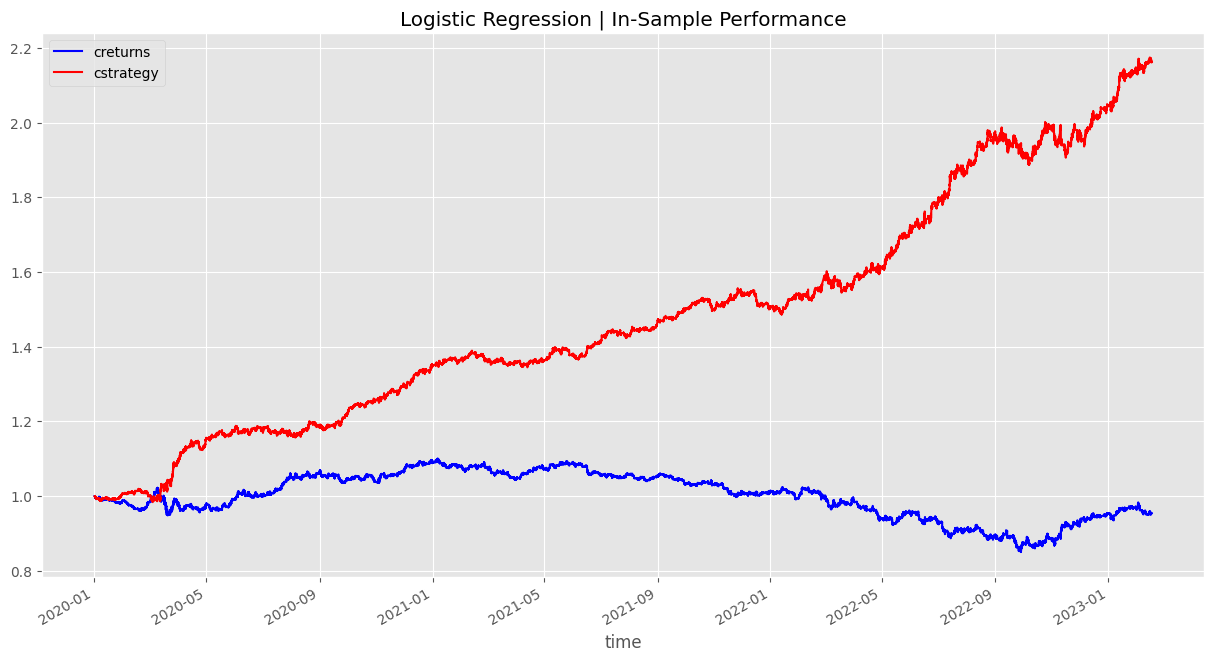

In [80]:
train[['creturns','cstrategy']].plot(figsize=(15,8), title='Logistic Regression | In-Sample Performance',color=['blue','red'])
plt.show()

# Out sample backtesting

In [63]:
test

,open,high,low,close
time,,,,
2023-02-16 14:00:00,1.07051,1.07081,1.07035,1.07057
2023-02-16 14:15:00,1.07057,1.07079,1.06966,1.06973
2023-02-16 14:30:00,1.06975,1.07020,1.06929,1.07019
2023-02-16 14:45:00,1.07019,1.07026,1.06917,1.06937
2023-02-16 15:00:00,1.06941,1.07012,1.06941,1.06999
...,...,...,...,...
2023-11-28 14:15:00,1.09586,1.09623,1.09525,1.09536
2023-11-28 14:30:00,1.09536,1.09581,1.09519,1.09562
2023-11-28 14:45:00,1.09561,1.09564,1.09472,1.09505


In [65]:
test['returns'] = np.log(test['close'] / test['close'].shift(1))
test.dropna(inplace=True)

In [67]:
test['direction'] = np.sign(test['returns'])

In [68]:
lags = 5
cols = []
for lag in range(1,lags+1):
    col = 'lag_{}'.format(lag)
    test[col] = test['returns'].shift(lag)
    cols.append(col)
test.dropna(inplace=True)


In [69]:
test.head()

,open,high,low,close,returns,direction,lag_1,lag_2,lag_3,lag_4,lag_5
time,,,,,,,,,,,
2023-02-16 15:30:00,1.07024,1.07025,1.06731,1.06885,-0.001318,-1.0,0.000252,0.000580,-0.000767,0.000430,-0.000785
2023-02-16 15:45:00,1.06884,1.06889,1.06698,1.06793,-0.000861,-1.0,-0.001318,0.000252,0.000580,-0.000767,0.000430
2023-02-16 16:00:00,1.06792,1.06892,1.06757,1.06806,0.000122,1.0,-0.000861,-0.001318,0.000252,0.000580,-0.000767
2023-02-16 16:15:00,1.06807,1.06853,1.06628,1.06649,-0.001471,-1.0,0.000122,-0.000861,-0.001318,0.000252,0.000580
2023-02-16 16:30:00,1.06649,1.06753,1.06642,1.06683,0.000319,1.0,-0.001471,0.000122,-0.000861,-0.001318,0.000252


In [70]:
test['prediction'] = lm.predict(test[cols])

In [71]:
test.prediction.value_counts()

prediction
 1.0    11044
-1.0     8444
Name: count, dtype: int64

In [72]:
hits = np.sign(test['prediction'] * test['direction']).value_counts()
hits


 1.0    9897
-1.0    9316
 0.0     275
Name: count, dtype: int64

In [73]:
hit_ratio = hits[1] / sum(hits) *100
hit_ratio

50.78509852216748

In [74]:
test['strategy'] = test['prediction'] * test['returns']


In [75]:
test['creturns'] = test['returns'].cumsum().apply(np.exp) 
test['cstrategy'] = test['strategy'].cumsum().apply(np.exp)


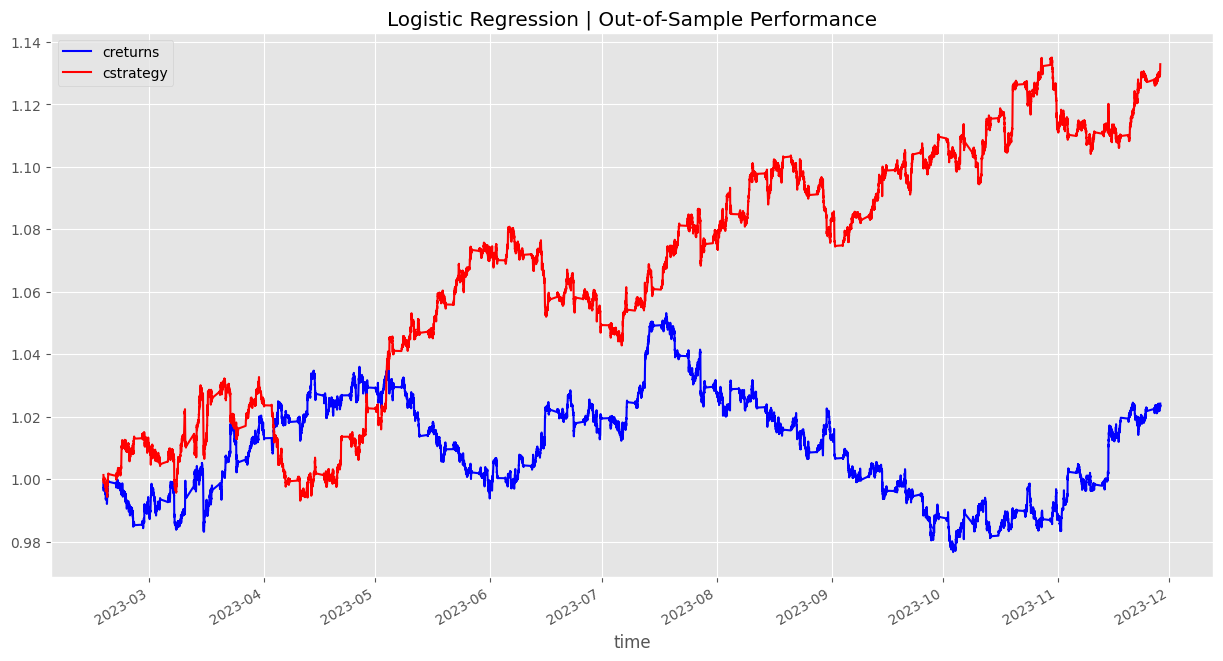

In [79]:
test[['creturns','cstrategy']].plot(figsize=(15,8), title='Logistic Regression | Out-of-Sample Performance',color=['blue','red'])
plt.show()

In [77]:
test['trades'] = test['prediction'].diff().fillna(0).abs()

In [78]:
test['trades'].value_counts()  

trades
0.0    12467
2.0     7021
Name: count, dtype: int64

Good to see there is more realistic performace in using out sample and still profitable strategy. 
Again like linear regression this is really basic approach.
There could be interesting add features like correlation with other instruments and difference to some moving averages. 
It is vectorised backtest, so no copying real equity of account.



Source and credit of Alexander Hagmann and his course 'Algorithmic Trading A-Z with Python, Machine Learning & AWS'!